# Loading Graphs in NetworkX

<IPython.core.display.Javascript object>


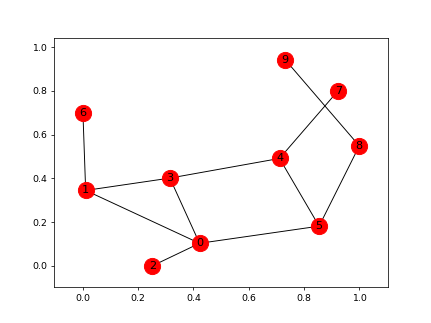

/home/swap9047/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/swap9047/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/swap9047/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


In [2]:
import networkx as nx
import numpy as np
import pandas as pd
%matplotlib notebook

G1 = nx.Graph()
G1.add_edges_from([(0, 1),
                   (0, 2),
                   (0, 3),
                   (0, 5),
                   (1, 3),
                   (1, 6),
                   (3, 4),
                   (4, 5),
                   (4, 7),
                   (5, 8),
                   (8, 9)])

nx.draw_networkx(G1)

### Adjacency List

In [3]:
!cat G_adjlist.txt

0 1 2 3 5
1 3 6
2
3 4
4 5 7
5 8
6
7
8 9
9


In [4]:
G2 = nx.read_adjlist('G_adjlist.txt', nodetype=int)
G2.edges()

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 5),
 (1, 3),
 (1, 6),
 (3, 4),
 (5, 4),
 (5, 8),
 (4, 7),
 (8, 9)]

### Adjacency Matrix

In [5]:
G_mat = np.array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
                  [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
                  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
                  [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])
G_mat

array([[0, 1, 1, 1, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [6]:
G3 = nx.Graph(G_mat)
G3.edges()

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 5),
 (1, 3),
 (1, 6),
 (3, 4),
 (4, 5),
 (4, 7),
 (5, 8),
 (8, 9)]

### Edgelist

In [7]:
!cat G_edgelist.txt

0 1 4
0 2 3
0 3 2
0 5 6
1 3 2
1 6 5
3 4 3
4 5 1
4 7 2
5 8 6
8 9 1


In [8]:
G4 = nx.read_edgelist('G_edgelist.txt', data=[('Weight', int)])

G4.edges(data=True)

[('0', '1', {'Weight': 4}),
 ('0', '2', {'Weight': 3}),
 ('0', '3', {'Weight': 2}),
 ('0', '5', {'Weight': 6}),
 ('1', '3', {'Weight': 2}),
 ('1', '6', {'Weight': 5}),
 ('3', '4', {'Weight': 3}),
 ('5', '4', {'Weight': 1}),
 ('5', '8', {'Weight': 6}),
 ('4', '7', {'Weight': 2}),
 ('8', '9', {'Weight': 1})]

### Pandas DataFrame

In [9]:
G_df = pd.read_csv('G_edgelist.txt', delim_whitespace=True, 
                   header=None, names=['n1', 'n2', 'weight'])
G_df

,n1,n2,weight
0,0,1,4
1,0,2,3
2,0,3,2
3,0,5,6
4,1,3,2
5,1,6,5
6,3,4,3
7,4,5,1
8,4,7,2
9,5,8,6


In [10]:
G5 = nx.from_pandas_dataframe(G_df, 'n1', 'n2', edge_attr='weight')
G5.edges(data=True)

[(0, 1, {'weight': 4}),
 (0, 2, {'weight': 3}),
 (0, 3, {'weight': 2}),
 (0, 5, {'weight': 6}),
 (1, 3, {'weight': 2}),
 (1, 6, {'weight': 5}),
 (3, 4, {'weight': 3}),
 (5, 4, {'weight': 1}),
 (5, 8, {'weight': 6}),
 (4, 7, {'weight': 2}),
 (8, 9, {'weight': 1})]

### Chess Example

In [11]:
!head -5 chess_graph

head: cannot open 'chess_graph' for reading: No such file or directory


In [ ]:
chess = nx.read_edgelist('chess_graph.txt', data=[('outcome', int), ('timestamp', float)], 
                         create_using=nx.MultiDiGraph())

In [ ]:
chess.is_directed(), chess.is_multigraph()

In [ ]:
chess.edges(data=True)

In [ ]:
games_played = chess.degree()
games_played

In [ ]:
max_value = max(games_played.values())
max_key, = [i for i in games_played.keys() if games_played[i] == max_value]

print('player {}\n{} games'.format(max_key, max_value))

In [ ]:
df = pd.DataFrame(chess.edges(data=True), columns=['white', 'black', 'outcome'])
df.head()

In [ ]:
df['outcome'] = df['outcome'].map(lambda x: x['outcome'])
df.head()

In [ ]:
won_as_white = df[df['outcome']==1].groupby('white').sum()
won_as_black = df[df['outcome']==-1].groupby('black').sum()
win_count = won_as_white.add(won_as_black, fill_value=0)
win_count.head()

In [ ]:
win_count.nlargest(5, 'outcome')